In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import  keras
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [7]:
df = pd.read_csv("./datasets/diabetes.csv")
df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0            6      148             72             35        0  33.6  \
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

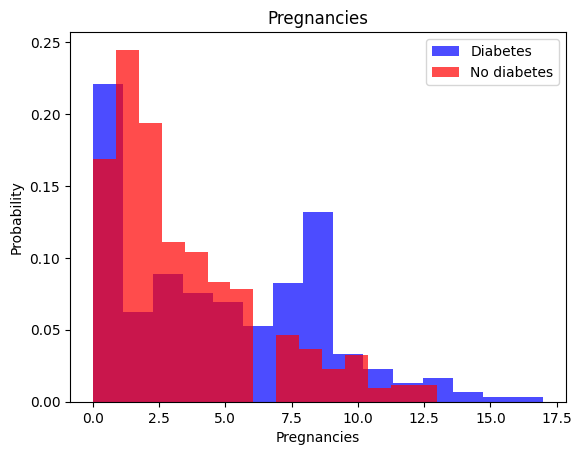

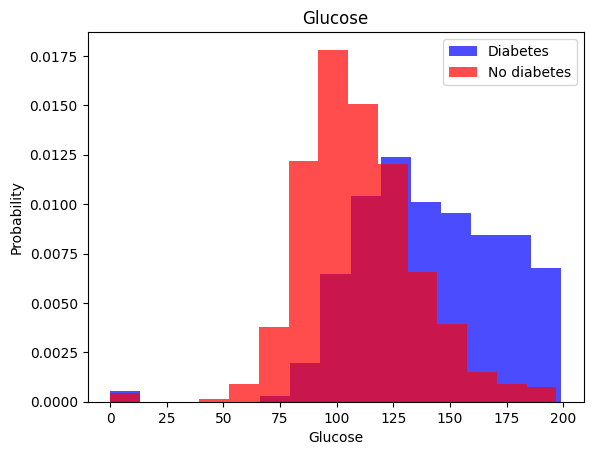

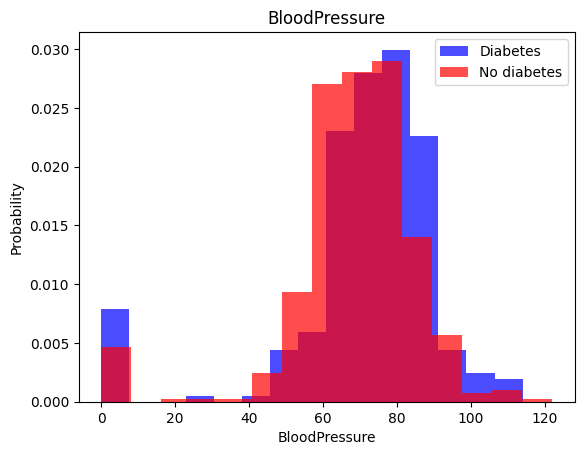

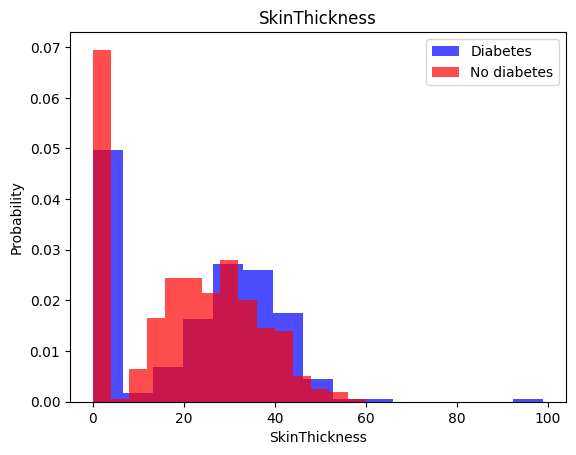

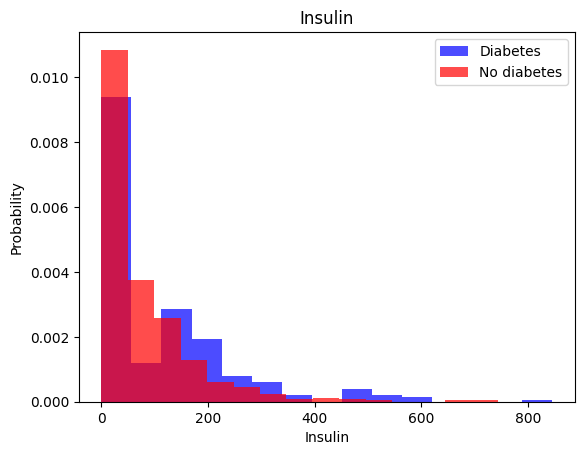

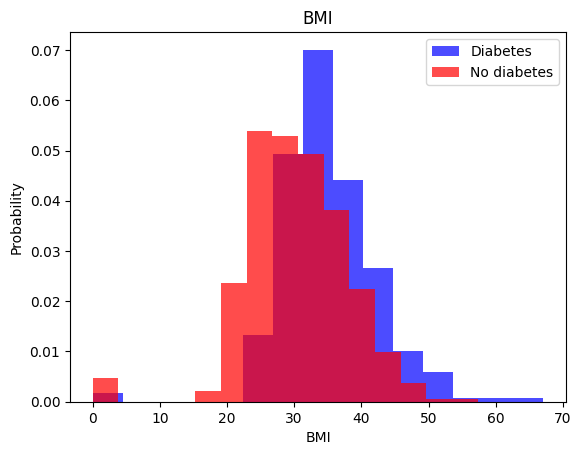

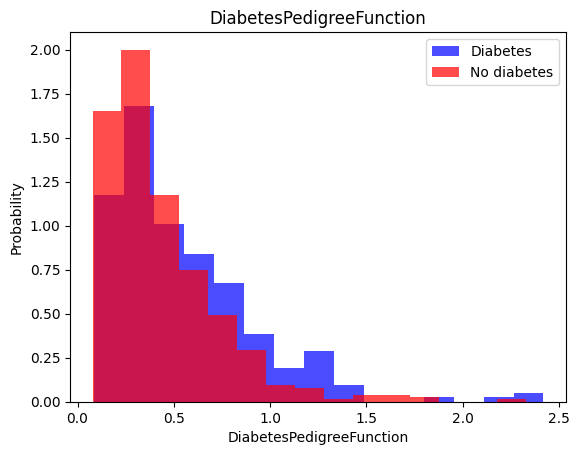

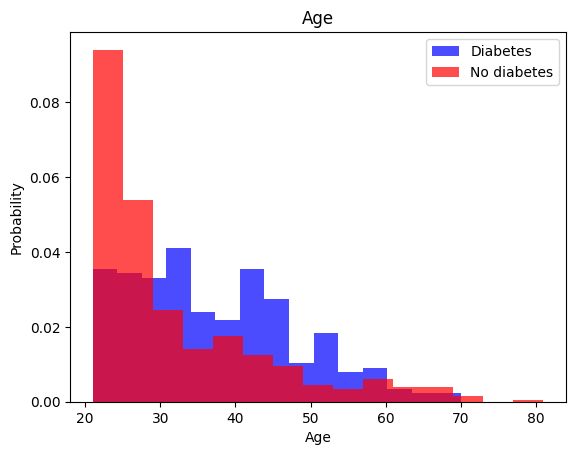

In [8]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color='blue', label="Diabetes", alpha=0.7, density=True, bins=15)
  plt.hist(df[df['Outcome']==0][label], color='red', label="No diabetes", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [34]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values


768

### Scale the value btw 0 - 1

In [37]:
X = StandardScaler().fit_transform(X)


balance the sets


In [67]:
X, y =  RandomOverSampler().fit_resample(X, y)



In [42]:
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [49]:
X_train,X_test,y_train ,y_test  = train_test_split(X,y,test_size=0.2)


In [55]:

model = keras.Sequential(
    [
      keras.layers.Dense(180,activation='relu'),
      keras.layers.Dense(60,activation='relu'),
      keras.layers.Dense(1,activation='sigmoid')
    ]
)
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [58]:
model.evaluate(X_train,y_train)

25/25 [==============================] - 0s 1ms/step - loss: 0.0739 - accuracy: 0.9800


[0.07390623539686203, 0.9800000190734863]

In [59]:
model.fit(
  X_train,
  y_train,
  epochs=100,
  validation_data=(X_test,y_test)
)

Epoch 1/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0666 - accuracy: 0.9875 - val_loss: 0.9186 - val_accuracy: 0.7850
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0654 - accuracy: 0.9900 - val_loss: 0.9918 - val_accuracy: 0.7700
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9887 - val_loss: 1.0089 - val_accuracy: 0.7550
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0723 - accuracy: 0.9812 - val_loss: 0.9931 - val_accuracy: 0.7750
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0631 - accuracy: 0.9900 - val_loss: 0.9231 - val_accuracy: 0.7850
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9925 - val_loss: 0.9557 - val_accuracy: 0.7800
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9962 - val_loss: 0.9774 - val_accuracy: 0.7750
Epoch 8/100
2

In [61]:
model.evaluate(X_train,y_train)

25/25 [==============================] - 0s 945us/step - loss: 0.0062 - accuracy: 1.0000


[0.006178254261612892, 1.0]